In [1]:
%load_ext kedro.extras.extensions.ipython

2022-06-27 17:52:23,200 - root - INFO - Updated path to Kedro project: C:\Users\Lianz\Documents\medgc-tesis
2022-06-27 17:52:24,002 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-

2022-06-27 17:52:49,138 - root - INFO - ** Kedro project MEDGC Tesis
2022-06-27 17:52:49,139 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-06-27 17:52:55,641 - root - INFO - Registered line magic `run_viz`


In [2]:
predicciones_afn = catalog.load("modelo_afn_predicciones")
predicciones_dann = catalog.load("modelo_dann_predicciones")
predicciones_adda = catalog.load("modelo_adda_predicciones")
predicciones_source_only = catalog.load("modelo_source_only_predicciones")
predicciones_target_only = catalog.load("modelo_target_only_predicciones")

2022-06-27 17:52:55,729 - kedro.io.data_catalog - INFO - Loading data from `modelo_afn_predicciones` (CSVDataSet)...
2022-06-27 17:52:55,919 - kedro.io.data_catalog - INFO - Loading data from `modelo_dann_predicciones` (CSVDataSet)...
2022-06-27 17:52:56,086 - kedro.io.data_catalog - INFO - Loading data from `modelo_adda_predicciones` (CSVDataSet)...
2022-06-27 17:52:56,263 - kedro.io.data_catalog - INFO - Loading data from `modelo_source_only_predicciones` (CSVDataSet)...
2022-06-27 17:52:56,437 - kedro.io.data_catalog - INFO - Loading data from `modelo_target_only_predicciones` (CSVDataSet)...


In [3]:
import pandas as pd

In [4]:
for algoritmo, prediccion in zip(['afn', 'dann', 'adda', 'source_only', 'target_only'], [predicciones_afn, predicciones_dann, predicciones_adda, predicciones_source_only, predicciones_target_only]):
    prediccion['algoritmo'] = algoritmo

predicciones = pd.concat( [predicciones_afn, predicciones_dann, predicciones_adda, predicciones_source_only, predicciones_target_only], ignore_index=True)
predicciones = predicciones.drop(columns=['cant_digitos', 'min_size_digitos', 'max_size_digitos', 'min_prop_blanco_digitos', 'max_prop_blanco_digitos'])
predicciones['acierto'] = (predicciones['votos'] == predicciones['voto_predicho']).astype(int)

In [5]:
predicciones.groupby(['algoritmo', 'partido', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179519   
                                                           SENADORES NACIONALES         184205   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32303   
                                                           SENADORES NACIONALES          32142   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         460867   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          52393   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          33969   
                                                           SENADORES NACIONALES          32690   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          58868   
                                                           SENADORES NACIONALES          55623   

                                                                                 cantidad_pred  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         282255   
                                                           SENADORES NACIONALES         284316   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES         125481   
                                                           SENADORES NACIONALES         129399   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         651091   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          99548   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          61415   
                                                           SENADORES NACIONALES          61440   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          91671   
                                                           SENADORES NACIONALES          87927   

                                                                                 iou_promedio  \
algoritmo   partido                                        tipo                                 
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES      0.765580   
                                                           SENADORES NACIONALES      0.754570   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES      0.808674   
                                                           SENADORES NACIONALES      0.807190   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES      0.813271   
...                                                                                       ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES      0.896861   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES      0.910819   
                                                           SENADORES NACIONALES      0.909725   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES      0.906682   
                                                           SENADORES NACIONALES      0.907185   

                                                                                 acierto_exacto_promedio  
algoritmo   partido                                        tipo                                           
adda        FRENTE AMPLIO PROGRESISTA                  

In [7]:
predicciones.groupby(['algoritmo', 'partido']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                                         
adda        FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
afn         FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
dann        FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
source_only FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
target_only FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   

                                                            cantidad_pred  \
algoritmo   partido                                                         
adda        FRENTE AMPLIO PROGRESISTA                              566571   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         254880   
            FRENTE DE TODOS                                       1316847   
            JUNTOS POR EL CAMBIO                       

In [8]:
predicciones.groupby(['algoritmo', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  cantidad_pred  iou_promedio  \
algoritmo   tipo                                                               
adda        DIPUTADOS NACIONALES        1476354        2770042      0.786714   
            SENADORES NACIONALES        1483890        2767028      0.786559   
afn         DIPUTADOS NACIONALES        1476354        2428997      0.748705   
            SENADORES NACIONALES        1483890        2500251      0.749616   
dann        DIPUTADOS NACIONALES        1476354        2521361      0.758800   
            SENADORES NACIONALES        1483890        2489522      0.757787   
source_only DIPUTADOS NACIONALES        1476354        4968023      0.611616   
            SENADORES NACIONALES        1483890        5051138      0.610845   
target_only DIPUTADOS NACIONALES        1476354        1661852      0.904991   
            SENADORES NACIONALES        1483890        1685580      0.903605   

                                  acierto_exacto_promedio  
algoritmo   tipo                                           
adda        DIPUTADOS NACIONALES                 0.722382  
            SENADORES NACIONALES                 0.722801  
afn         DIPUTADOS NACIONALES                 0.672602  
            SENADORES NACIONALES                 0.673155  
dann        DIPUTADOS NACIONALES                 0.691447  
            SENADORES NACIONALES                 0.691850  
source_only DIPUTADOS NACIONALES                 0.476820  
            SENADORES NACIONALES                 0.476401  
target_only DIPUTADOS NACIONALES                 0.873447  
            SENADORES NACIONALES                 0.870848

In [9]:
from matplotlib import pyplot as plt

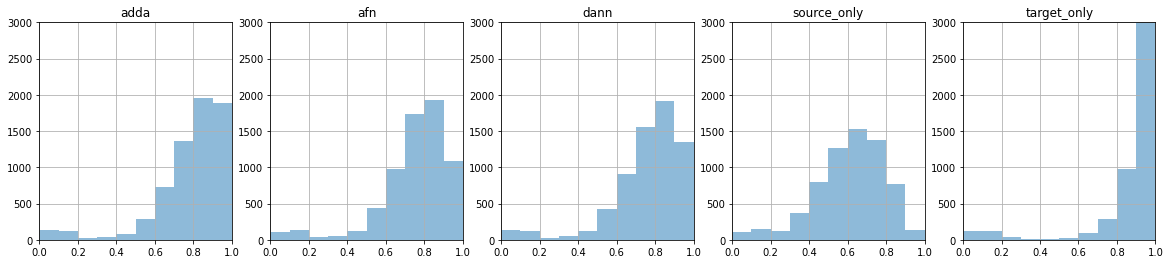

In [10]:
ious = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        iou=('iou', 'mean')
    )
    .reset_index()
    .groupby('algoritmo')['iou']
)

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 4))
for (i, d), ax in zip(ious, axes):
    d.hist(alpha=0.5, label=i, ax=ax)
    ax.set_title(i)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3_000)

plt.show()


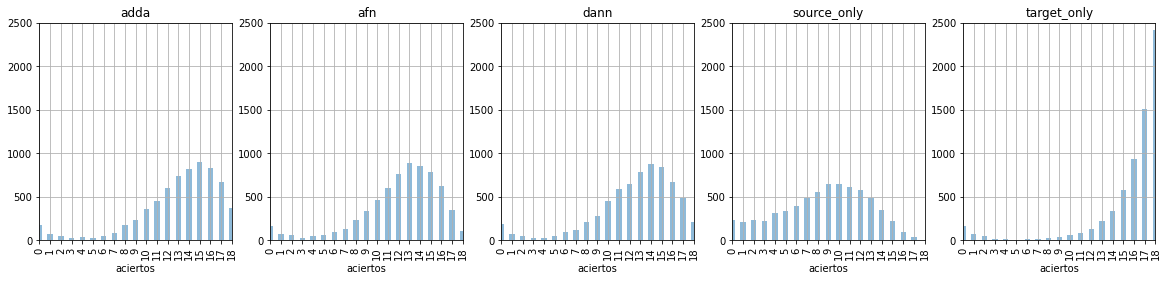

In [16]:
aciertos = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        aciertos=('acierto', 'sum')
    )
    .reset_index()
    .groupby(['algoritmo', 'aciertos']).size()
    .reset_index()
    .rename(columns={0: 'cantidad'})
    .groupby(['algoritmo'])
)

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 4))
for (i, d), ax in zip(aciertos, axes):
    d.set_index('aciertos').plot(kind='bar', alpha=0.5, label=i, ax=ax, legend=False)
    ax.set_title(i)
    ax.grid()
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 2_500)

plt.show()

In [31]:
(
    predicciones
    .query("algoritmo == 'adda'")
    .groupby('id_telegrama')
    .agg(iou=('iou', 'mean'))
    .query("iou < 0.3")
).head(10)

,iou
id_telegrama,
2100100026X,0.046296
2100100034X,0.101852
2100100072X,0.111111
2100100099X,0.157407
2100200141X,0.111111
2100200144X,0.046296
2100200145X,0.111111
2100200164X,0.175926
2100200175X,0.046296


In [20]:
from PIL import Image
import cv2
from IPython.display import display

In [21]:
def imgshow(img) -> None:
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

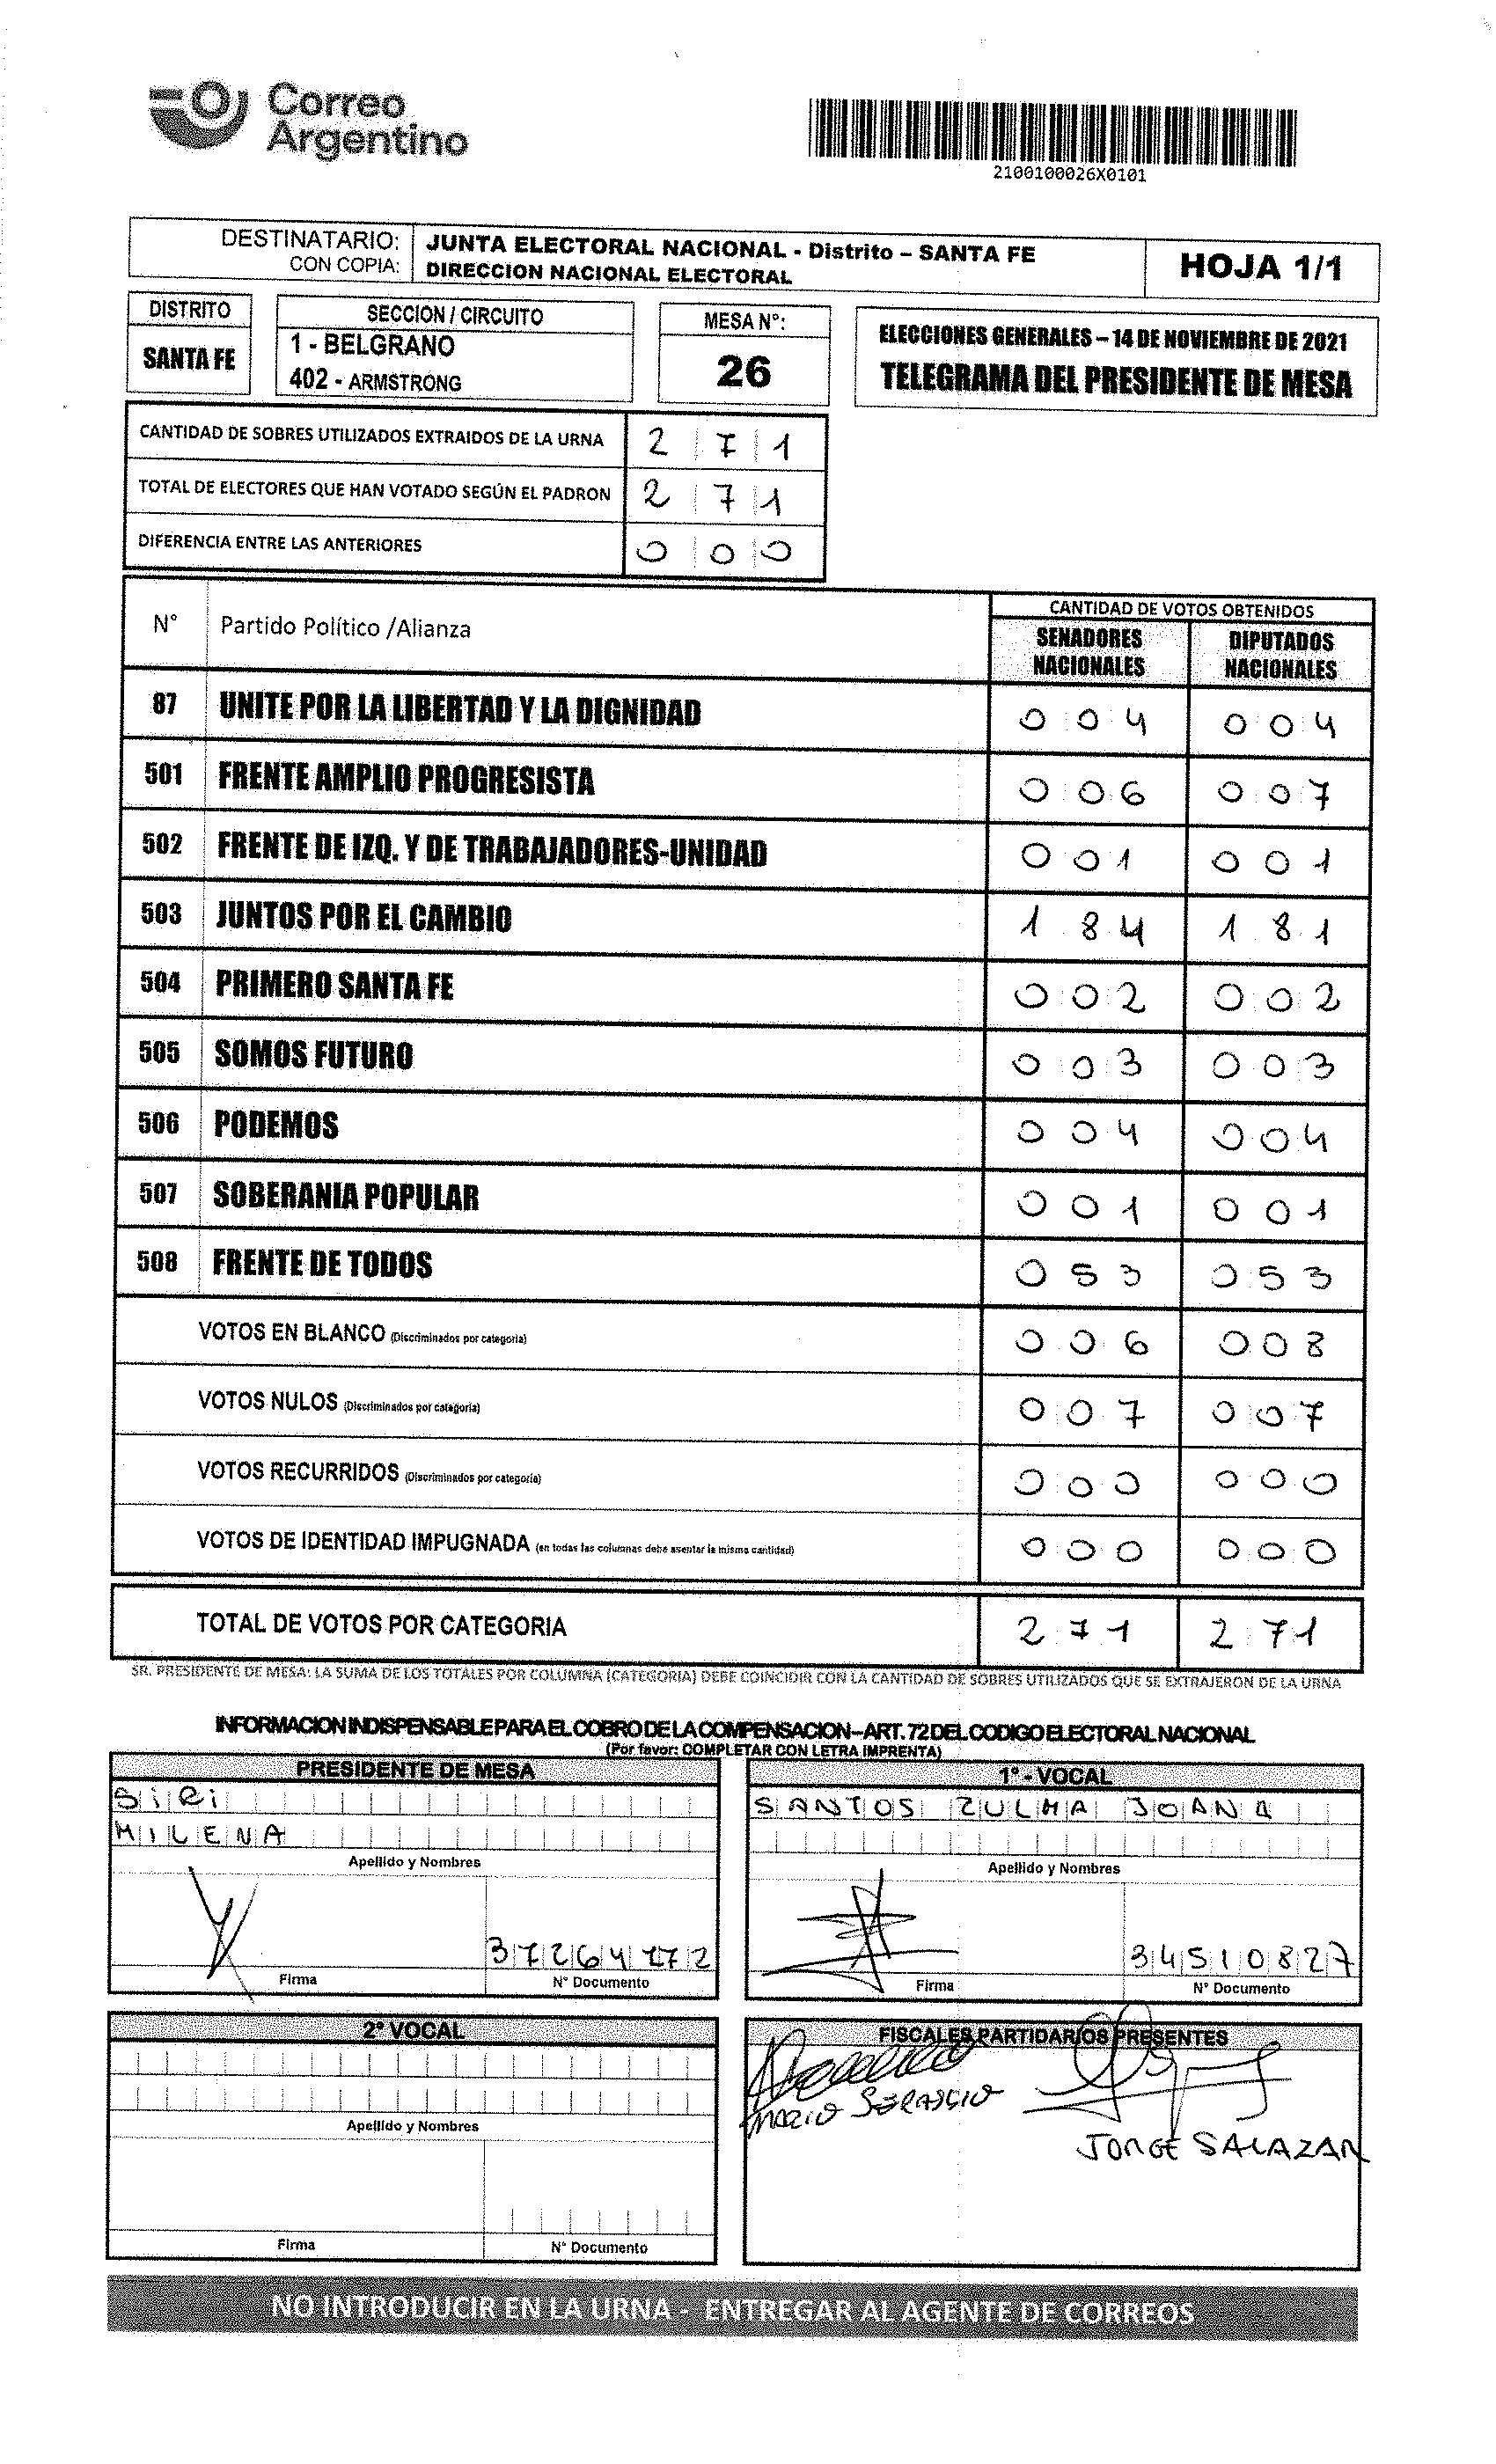

In [32]:
img_id = '2100100026X'
img = cv2.imread(f'C:/Users/Lianz/Documents/medgc-tesis/data/01_raw/telegramas/{img_id}.tiff')
imgshow(img)

In [36]:
(
    predicciones
    .query(f"id_telegrama == '{img_id}'")
    .query("algoritmo == 'adda'")
)

,id_telegrama,partido,tipo,mesa,votos,voto_predicho,iou,algoritmo,acierto
238950,2100100026X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,SENADORES NACIONALES,00026X,4,6,0.000000,adda,0
238951,2100100026X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,DIPUTADOS NACIONALES,00026X,4,7,0.000000,adda,0
238952,2100100026X,FRENTE AMPLIO PROGRESISTA,SENADORES NACIONALES,00026X,6,0,0.000000,adda,0
238953,2100100026X,FRENTE AMPLIO PROGRESISTA,DIPUTADOS NACIONALES,00026X,7,1,0.000000,adda,0
238954,2100100026X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,SENADORES NACIONALES,00026X,1,184,0.333333,adda,0
238955,2100100026X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,DIPUTADOS NACIONALES,00026X,1,181,0.500000,adda,0
238956,2100100026X,JUNTOS POR EL CAMBIO,SENADORES NACIONALES,00026X,184,2,0.000000,adda,0
238957,2100100026X,JUNTOS POR EL CAMBIO,DIPUTADOS NACIONALES,00026X,181,2,0.000000,adda,0
238958,2100100026X,PRIMERO SANTA FE,SENADORES NACIONALES,00026X,2,3,0.000000,adda,0
238959,2100100026X,PRIMERO SANTA FE,DIPUTADOS NACIONALES,00026X,2,3,0.000000,adda,0
